In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

data_dir = "C:/Users/Blanc/DataScientist/StatisticalTesting/src/data/"

In [2]:
df = pd.read_parquet(data_dir + "conversion.parquet")

df_DKV = df.loc[df["sector"] == "Insurer", "percentage"]
df_Agent = df.loc[df["sector"] == "Agent", "percentage"]
df_Broker = df.loc[df["sector"] == "Broker", "percentage"]

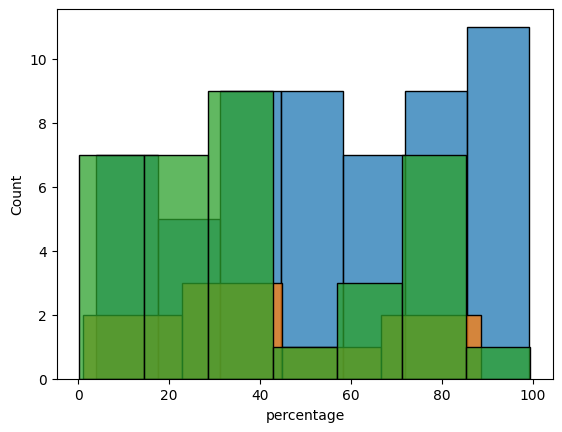

In [3]:
all = [df_DKV, df_Agent, df_Broker]

for _ in all:
  sns.histplot(_)

In [4]:
scipy.stats.f_oneway(df_DKV, df_Agent, df_Broker)

F_onewayResult(statistic=np.float64(4.039099345712162), pvalue=np.float64(0.020656991828644757))

In [5]:
model = ols("percentage ~ C(sector)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq    df         F    PR(>F)
C(sector)   6401.620547   2.0  4.039099  0.020657
Residual   76868.274328  97.0       NaN       NaN


In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['percentage'],
                          groups=df['sector'],
                          alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2 meandiff p-adj   lower    upper  reject
------------------------------------------------------
 Agent  Broker   -3.396 0.9491 -29.6539 22.8619  False
 Agent Insurer  13.3019  0.426 -11.9957 38.5995  False
Broker Insurer  16.6979 0.0187    2.309 31.0868   True
------------------------------------------------------


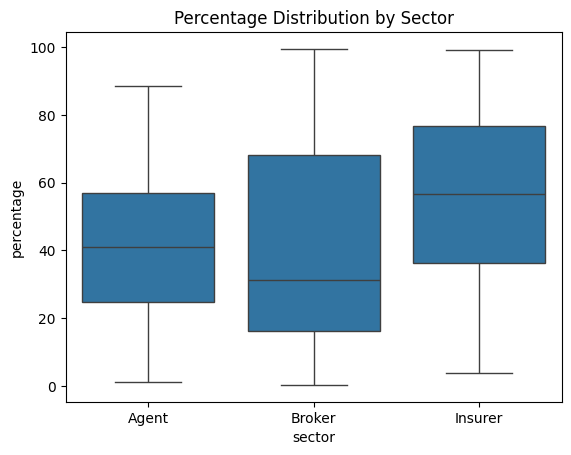

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="sector", y="percentage", data=df)
plt.title("Percentage Distribution by Sector")
plt.show()

C:\Users\Blanc\AppData\Local\Temp\ipykernel_31800\1813666654.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby("sector")["percentage"].mean()
C:\Users\Blanc\AppData\Local\Temp\ipykernel_31800\1813666654.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stds = df.groupby("sector")["percentage"].std()
C:\Users\Blanc\AppData\Local\Temp\ipykernel_31800\1813666654.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

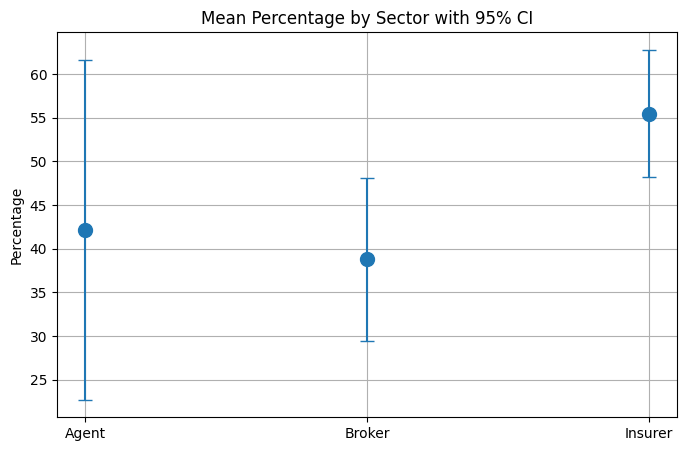

In [9]:
# --- Calculate means and 95% CI ---
means = df.groupby("sector")["percentage"].mean()
stds = df.groupby("sector")["percentage"].std()
ns = df.groupby("sector")["percentage"].count()
ci95 = 1.96 * stds / np.sqrt(ns)

# --- Plot ---
plt.figure(figsize=(8,5))
plt.errorbar(means.index, means.values, yerr=ci95.values, fmt='o', capsize=5, markersize=10)
plt.ylabel("Percentage")
plt.title("Mean Percentage by Sector with 95% CI")
plt.grid(True)
plt.show()